<a href="https://colab.research.google.com/github/selaaulia/PCVK_Genap_2022/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Praktikum**

In [1]:
# Mengakses drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


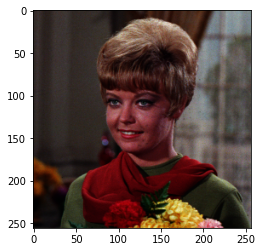

In [3]:
# Melakukan import library
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

# Import foto dari drive

img_f = cv.imread('/content/drive/MyDrive/POLINEMA/Semester_6/PCVK/Pertemuan_3/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

Gamma Correction pada citra
-----------------------------------
Masukkan nilai Gamma: 3


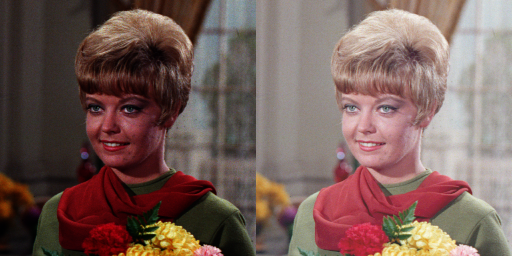

In [5]:
# 1. Praktikum 1

print('Gamma Correction pada citra')
print('-----------------------------------')
try:
  gamma = int (input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Simulasi Image Depth 
----------------------
Masukkan nilai bit depth: 3


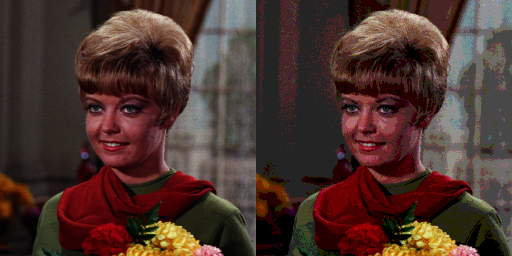

In [34]:
# Tugas Praktikum 2

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth ')
print('----------------------')
try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

Jumlah Citra :  5
PSNR value :  24.131198464651863


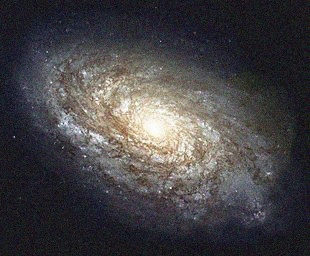

--------------------
Jumlah Citra :  30
PSNR value :  21.028939022374566


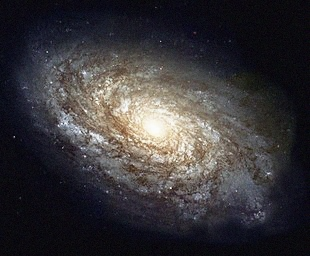

--------------------
Jumlah Citra :  60
PSNR value :  20.67647768040637


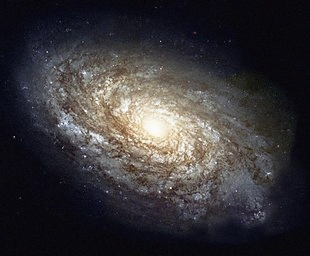

--------------------
Jumlah Citra :  80
PSNR value :  20.432334561852787


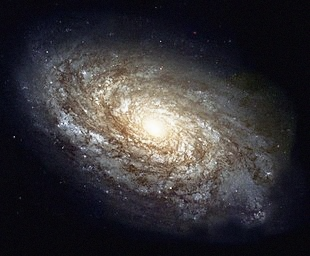

--------------------
Jumlah Citra :  100
PSNR value :  20.18151664466341


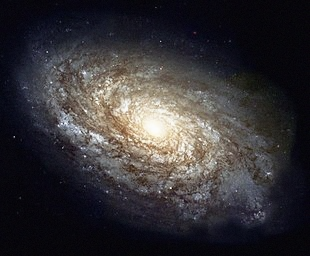

In [40]:
# Tugas Praktikum 3
import math
import glob

location="/content/drive/MyDrive/POLINEMA/Semester_6/PCVK/Pertemuan_5/noises/*.jpg"
pic=glob.glob(location)
pic.sort()

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): 
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

def img_number(n): 
    temp = cv.imread(pic[0])
    sum_arr = np.zeros(temp.shape)
    for picture in pic[0:n]:
        img = cv.imread(picture)
        sum_arr = sum_arr + img
    denoised_img = sum_arr / n
    output = cv.normalize(denoised_img, None, 0, 255, cv.NORM_MINMAX)
    print('Jumlah Citra : ', n)
    print('PSNR value : ',PSNR(temp, output))
    galaxy_frame = cv.hconcat((original, dst))
    cv2_imshow(output)

img_number(5)
print('--------------------')
img_number(30)
print('--------------------')
img_number(60)
print('--------------------')
img_number(80)
print('--------------------')
img_number(100)

image input


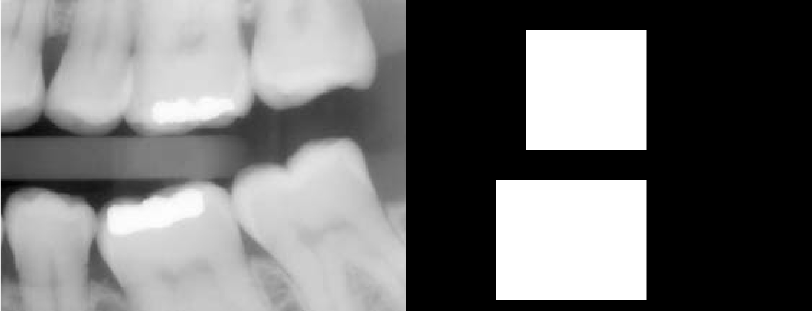

image output:


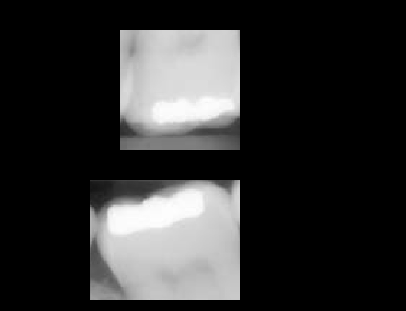

In [31]:
# Tugas Praktikum 4

image = cv.imread('/content/drive/MyDrive/POLINEMA/Semester_6/PCVK/Pertemuan_5/teeth.jpg')
black = np.zeros(image.shape, image.dtype)
mask = cv.rectangle(black, (400, 100), (800,500), [255,255,255], cv.FILLED)
mask = cv.rectangle(mask, (300, 600), (800,1000), [255,255,255], cv.FILLED)
print('image input')
frame = cv.hconcat((image, mask))
frame = cv.resize(frame, (0,0), fx=0.3, fy=0.3) 
cv2_imshow(frame)
print('image output:')
masked_img = cv.bitwise_and(image, mask)
masked_img = cv.resize(masked_img, (0,0), fx=0.3, fy=0.3) 
cv2_imshow(masked_img)

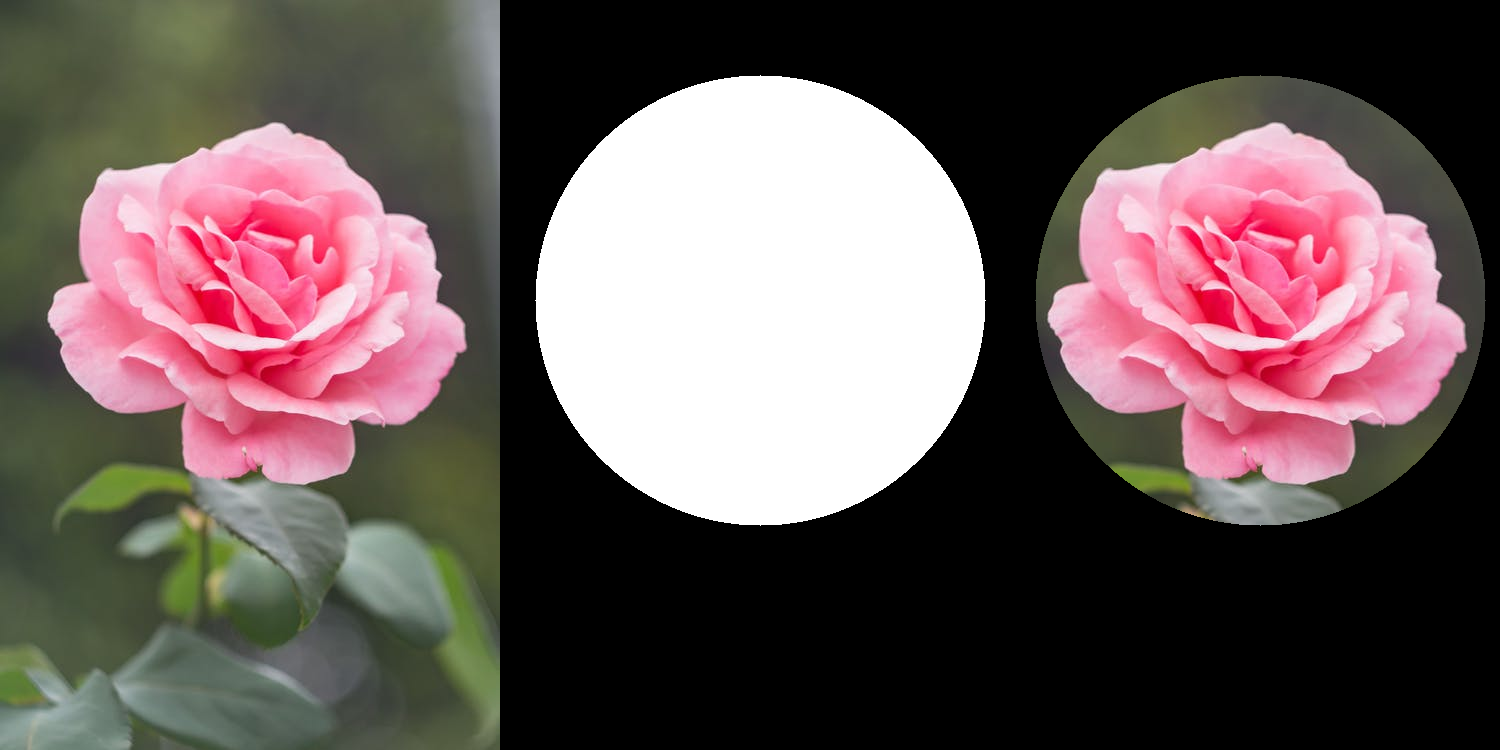

In [16]:
# Tugas Praktikum 5A (AND)

img_rose = cv.imread('/content/drive/MyDrive/POLINEMA/Semester_6/PCVK/Pertemuan_5/rose_pink.png')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

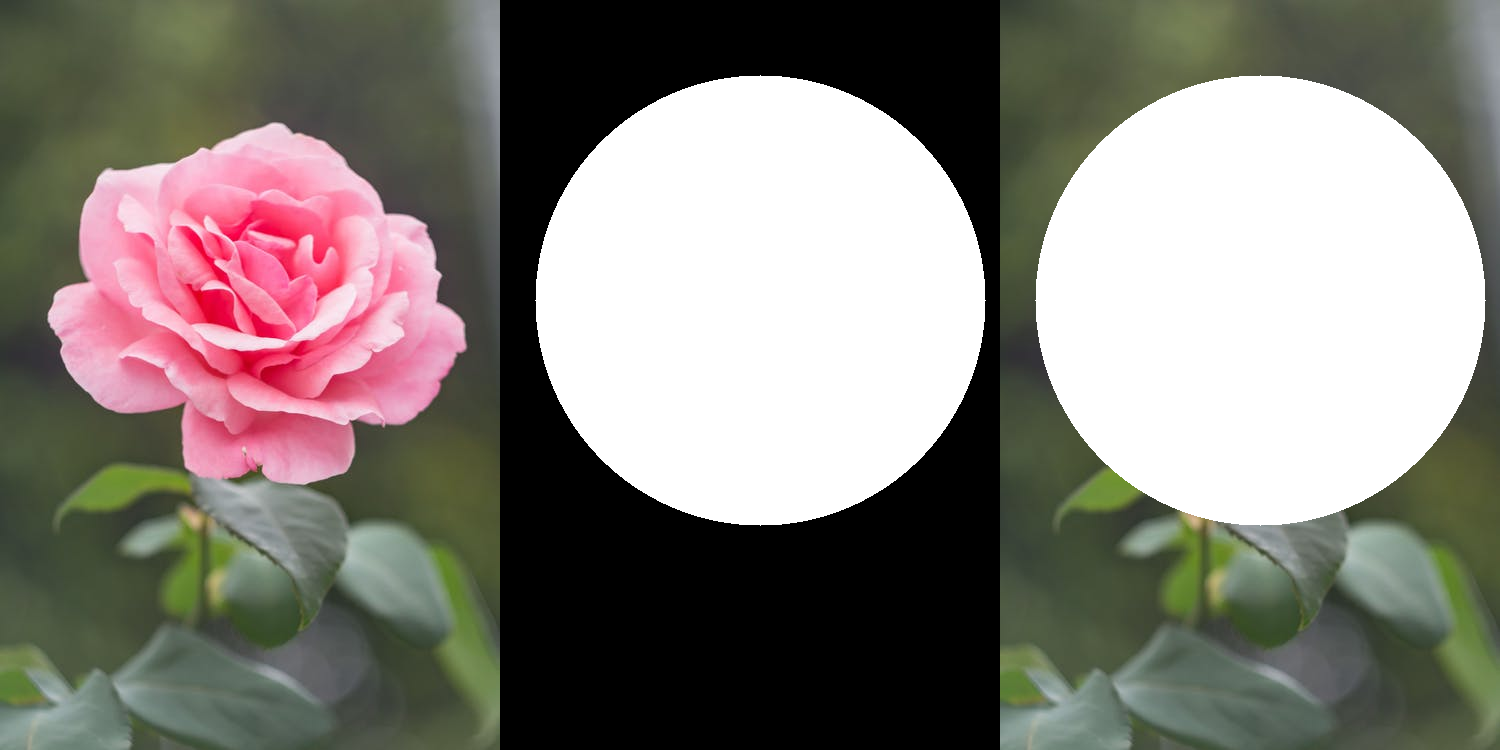

In [17]:
# Tugas Praktikum 5B (OR)

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

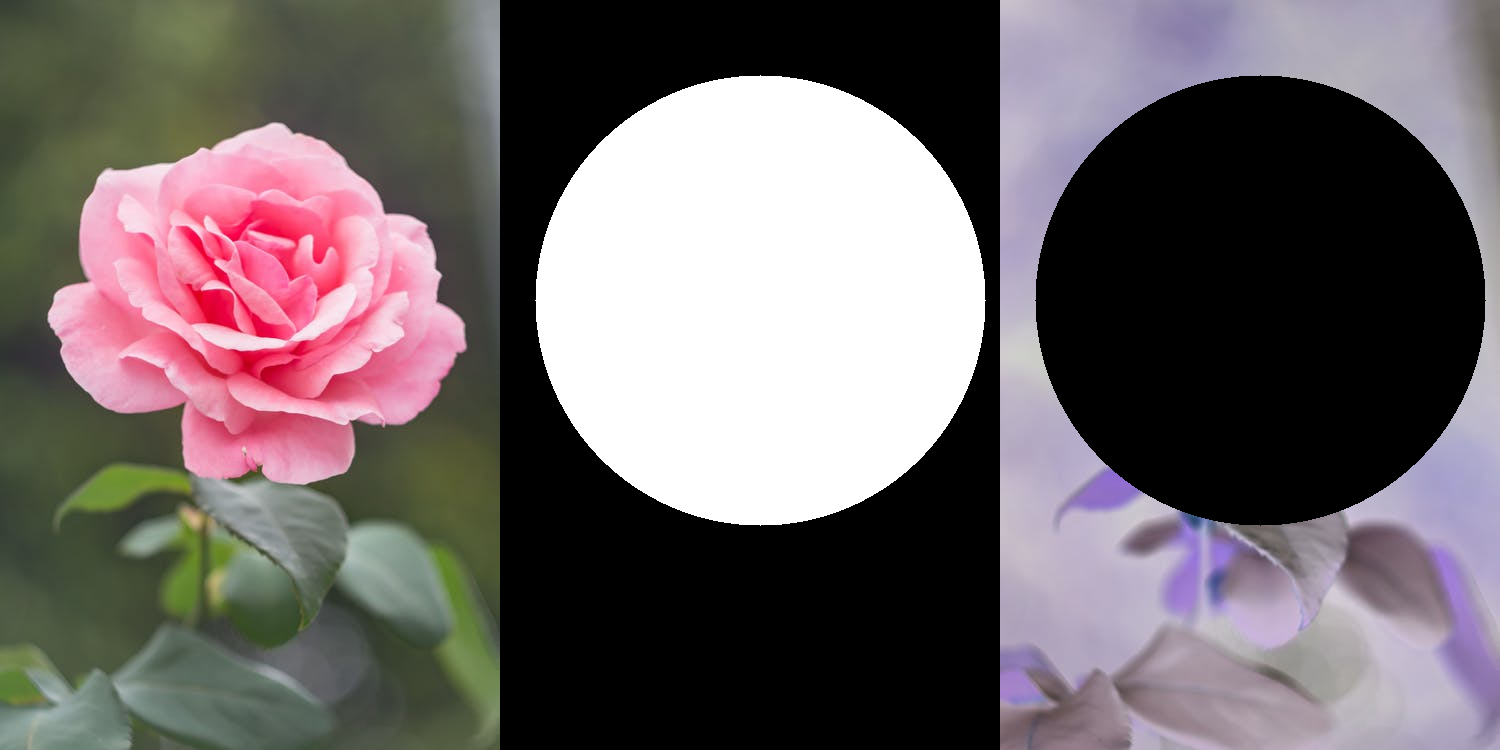

In [18]:
# Tugas Praktikum 5C (NOT)

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

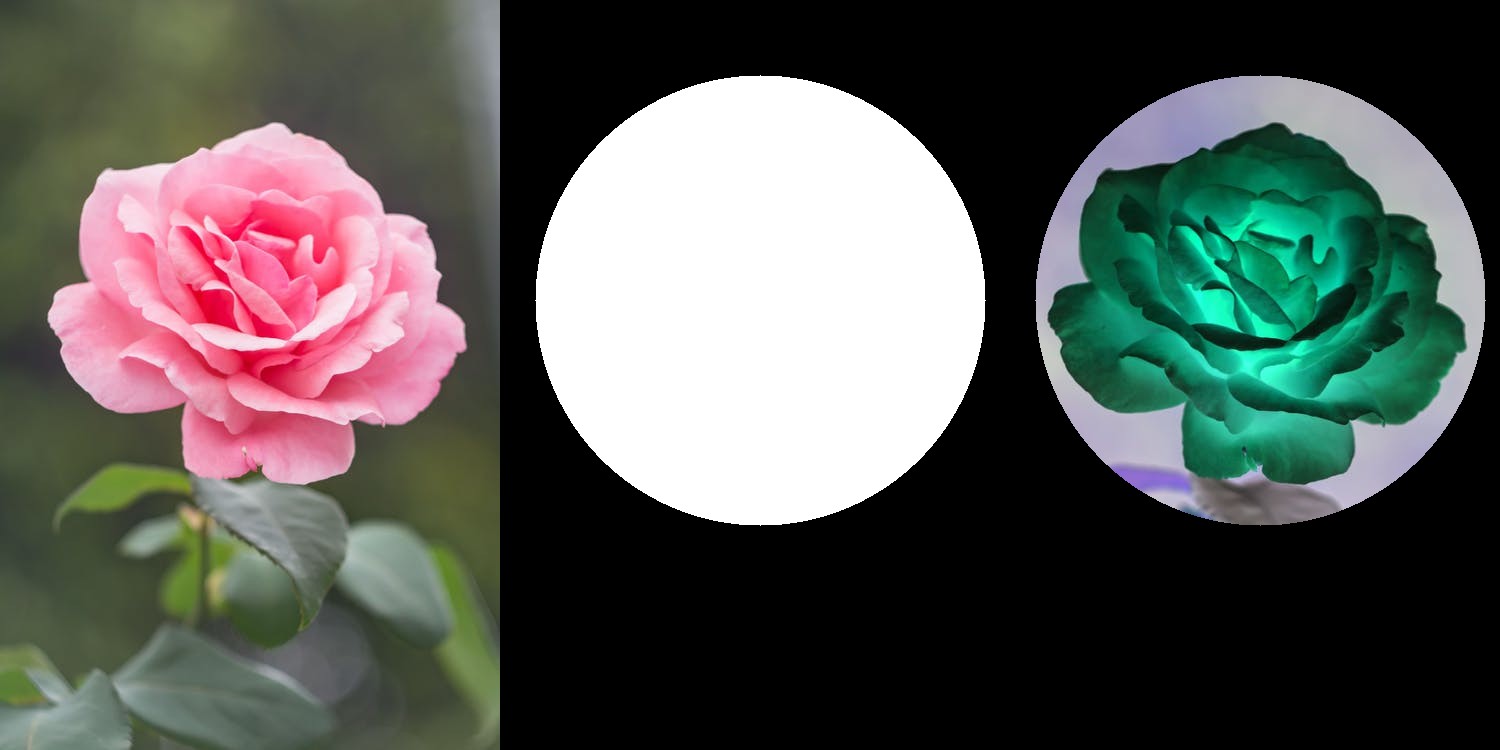

In [19]:
# Tugas Praktikum 5D (NOT AND)

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

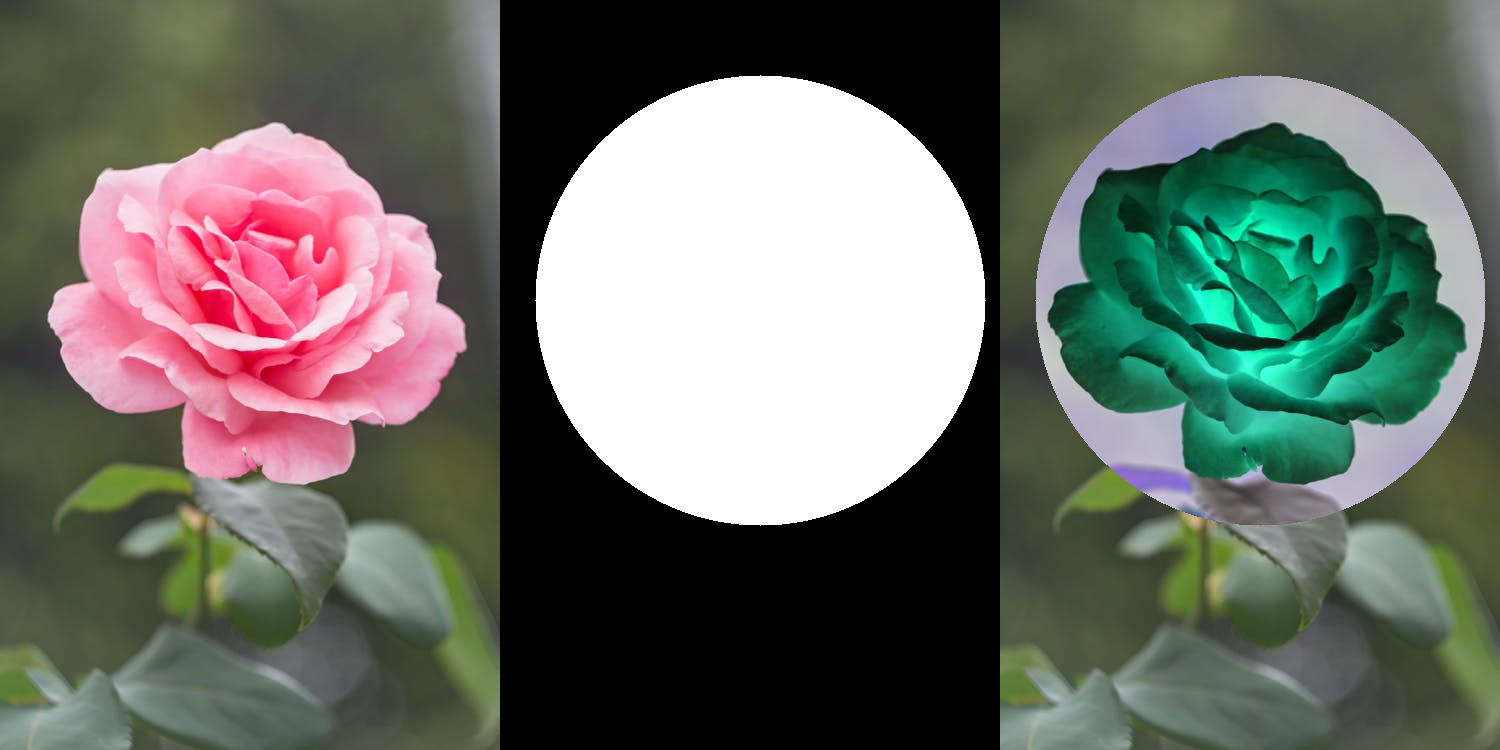

In [20]:
# Tugas Praktikum 5E (XOR)

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

image input


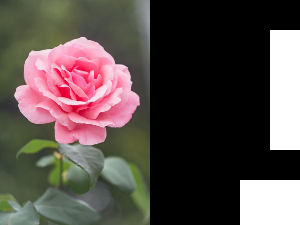

image output:


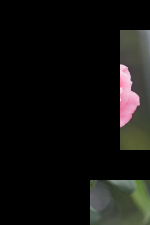

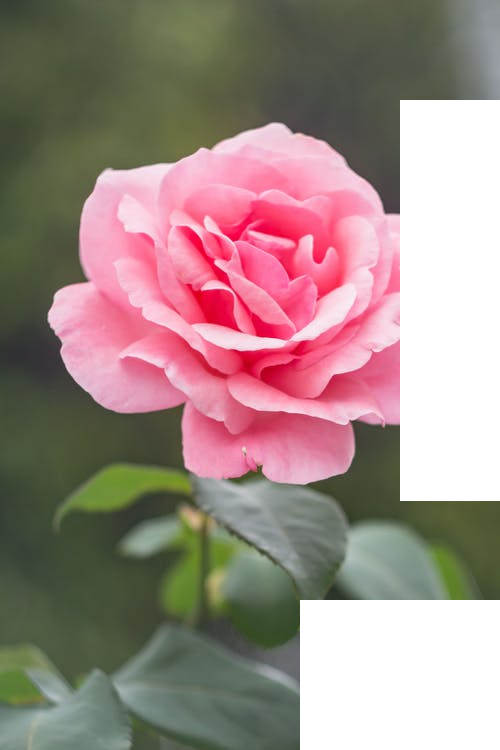

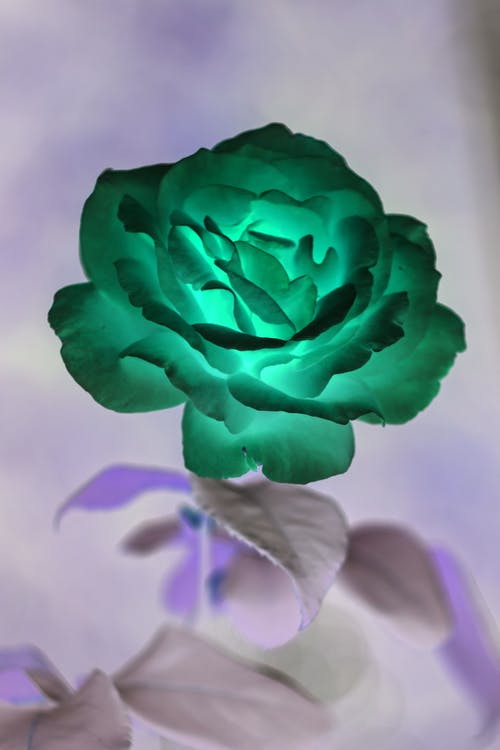

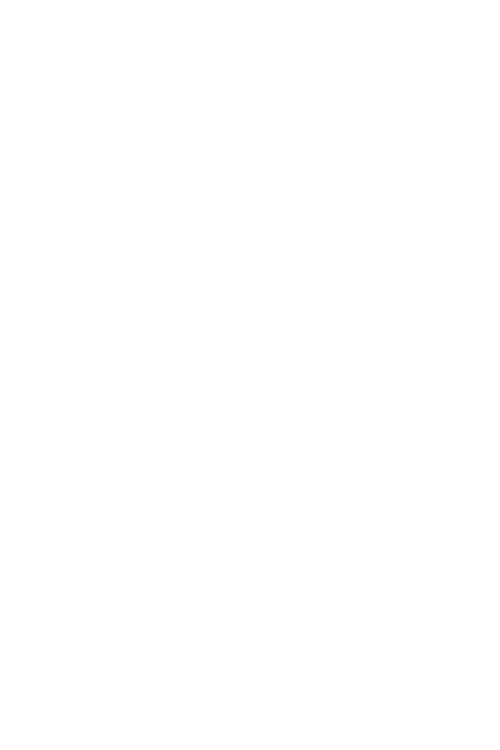

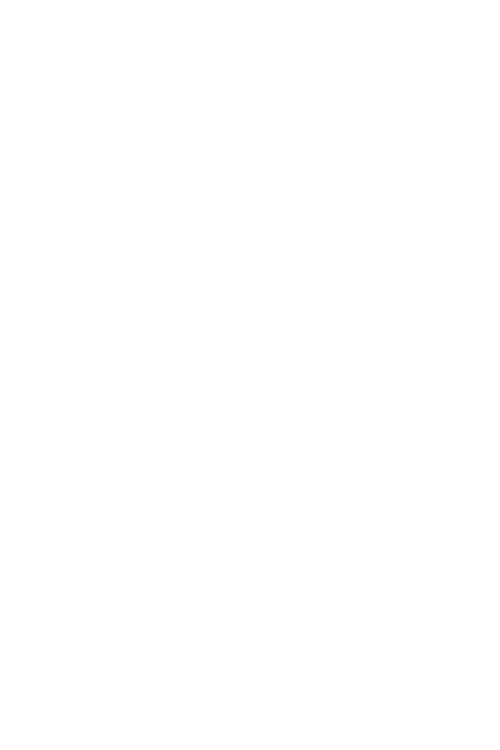

In [30]:
image = cv.imread('/content/drive/MyDrive/POLINEMA/Semester_6/PCVK/Pertemuan_5/rose_pink.png')
black = np.zeros(image.shape, image.dtype)
mask = cv.rectangle(black, (400, 100), (800,500), [255,255,255], cv.FILLED)
mask = cv.rectangle(mask, (300, 600), (800,1000), [255,255,255], cv.FILLED)
print('image input')
frame = cv.hconcat((image, mask))
frame = cv.resize(frame, (0,0), fx=0.3, fy=0.3) 
cv2_imshow(frame)
print('image output:')
masked_img = cv.bitwise_and(image, mask)
masked_img = cv.resize(masked_img, (0,0), fx=0.3, fy=0.3) 
cv2_imshow(masked_img)
masked_img = cv.bitwise_or(image, mask)
cv2_imshow(masked_img)
masked_img = cv.bitwise_not(image, mask)
cv2_imshow(masked_img)
masked_img = cv.bitwise_not(cv.bitwise_and(image, mask))
cv2_imshow(masked_img)
masked_img = cv.bitwise_xor(image, mask)
cv2_imshow(masked_img)